In [61]:
import seaborn as sns
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

# plot_confusion_matrix is a handy visual tool, added in the latest version of scikit-learn
# if you are running an older version, comment out this line and just use confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [21]:
import sys
import pathlib
src_path = pathlib.Path().absolute().parent / "src"
sys.path.append(str(src_path))
import data_functions

In [7]:
X_train, X_test, y_train = data_functions.get_dataframes()

In [29]:
#Look at first five rows to see example values in each column
X_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [9]:
# Number or total rows and columns
X_train.shape

(59400, 39)

In [13]:
# Too many columns to see in head, print out all columns names to know what working with
X_train.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [17]:
#Summarize numeric values, take out scientific notation.
X_train.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

#not really helpful for these numeric values

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-11.649440,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-0.000000,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [18]:
# Get an overview of data type and null values
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [19]:
#inspect null values in each column
X_train.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [54]:
#concat y_train and x_train for initial look at relationship
#Xy_df = pd.concat([X_train, y_train])

In [51]:
#X_tr_df= pd.read_csv('/data/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')
# y_tr_df = pd.read_csv('data/Pump_it_Up_Mining_the_Water_Table_-_Training_set_labels.csv')

#X_tr_df= pd.read_csv('../Downloads/4910797b-ee55-40a7-8668-10efd5c1b960.csv')
#y_tr_df = pd.read_csv('../Downloads/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')

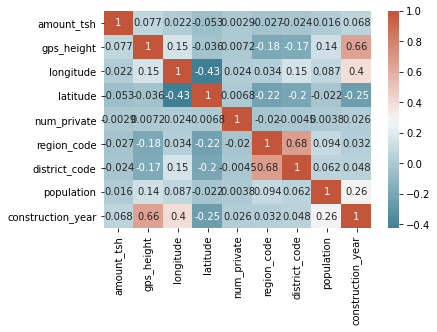

In [56]:
#Correlation Matrix to see numerical feature relationship
corr = X_train.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [60]:
X_tr_strict = X_train.drop(['date_recorded','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], axis=1)
X_tr_loose=X_train.drop(['date_recorded','funder','installer','wpt_name', 'subvillage','recorded_by','scheme_name','extraction_type',
             'extraction_type_class','payment','management','management_group','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], axis=1)

In [ ]:
ohe= OneHotEncoder()
ohe.

def encode_and_concat_feature_train(X_train, feature_name):
    """
    Helper function for transforming training data.  It takes in the full X dataframe and
    feature name, makes a one-hot encoder, and returns the encoder as well as the dataframe
    with that feature transformed into multiple columns of 1s and 0s
    """
    # make a one-hot encoder and fit it to the training data
    ohe = OneHotEncoder(categories="auto", handle_unknown="ignore")
    single_feature_df = X_train[[feature_name]]
    ohe.fit(single_feature_df)
    
    # call helper function that actually encodes the feature and concats it
    X_train = encode_and_concat_feature(X_train, feature_name, ohe)
    
    return ohe, X_train


def encode_and_concat_feature(X, feature_name, ohe):
    """
    Helper function for transforming a feature into multiple columns of 1s and 0s. Used
    in both training and testing steps.  Takes in the full X dataframe, feature name, 
    and encoder, and returns the dataframe with that feature transformed into multiple
    columns of 1s and 0s
    """
    # create new one-hot encoded df based on the feature
    single_feature_df = X[[feature_name]]
    feature_array = ohe.transform(single_feature_df).toarray()
    ohe_df = pd.DataFrame(feature_array, columns=ohe.categories_[0], index=X.index)
    
    # drop the old feature from X and concat the new one-hot encoded df
    X = X.drop(feature_name, axis=1)
    X = pd.concat([X, ohe_df], axis=1)
    
    return X

In [62]:

lg = LogisticRegression()
lg.fit(X_train, y_train)

ValueError: could not convert string to float: 'hand pump'

In [ ]:
fig, ax = plt.subplots()

fig.suptitle("FSM")

plot_confusion_matrix(fsm, X_train, y_train, ax=ax, cmap="plasma");

In [44]:
df['construction_year'].isna().value_counts()

cons

False    59400
Name: construction_year, dtype: int64

In [36]:
df['installer'].value_counts()

DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
              ...  
kegocha           1
ACT MARA          1
LUWASSA           1
MTAMBO            1
TLC/Samora        1
Name: installer, Length: 2145, dtype: int64

In [49]:
t_tr_copy= x_train

x_train['contruction_year'] == none


In [28]:
for col_name in df.rows:
    if df['installer'].dtypes =='object':
        unique_cat= len(df[col_name].unique())
        print(col_name, unique_cat)

AttributeError: 'DataFrame' object has no attribute 'rows'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [37]:
x_train.installer.isna.value_counts()

AttributeError: 'function' object has no attribute 'value_counts'

In [9]:
#X_train_num = df.select_dtypes(exclude='object')
#X_cat_train = df.select_dtypes(exclude='int64')

In [ ]:
#X_train_num

In [10]:
for col_name in X_cat_train.columns:
    if X_cat_train[col_name].dtypes =='object':
        unique_cat= len(X_cat_train[col_name].unique())
        print(col_name, unique_cat)

date_recorded 356
funder 1898
installer 2146
wpt_name 37400
basin 9
subvillage 19288
region 21
lga 125
ward 2092
public_meeting 3
recorded_by 1
scheme_management 13
scheme_name 2697
permit 3
extraction_type 18
extraction_type_group 13
extraction_type_class 7
management 12
management_group 5
payment 7
payment_type 7
water_quality 8
quality_group 6
quantity 5
quantity_group 5
source 10
source_type 7
source_class 3
waterpoint_type 7
waterpoint_type_group 6


recorded_by 1
scheme_management 13
scheme_name 2697
permit 3
extraction_type 18
extraction_type_group 13
extraction_type_class 7
management 12
management_group 5
payment 7
payment_type 7

In [11]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [12]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [13]:
df['scheme_name'].value_counts()

K                                               682
None                                            644
Borehole                                        546
Chalinze wate                                   405
M                                               400
                                               ... 
Loronu water supply                               1
Nyakayenzi gravity/point source water supply      1
BL sangarini                                      1
Nameqhuwadiba                                     1
Mradi wa maji wa matogo                           1
Name: scheme_name, Length: 2696, dtype: int64

In [14]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [15]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [16]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [17]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [18]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [19]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [20]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [21]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [13]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

functional                 174
non functional              93
functional needs repair     72
Name: status_group, dtype: int64

In [10]:
X_train = df

In [11]:
X_train_strict_feat = X_train.drop(['date_recorded','funder','wpt_name', 'subvillage','ward','recorded_by','scheme_name','scheme_management','extraction_type',
             'extraction_type_class','payment','public_meeting','permit','management','management_group','source','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], axis=1)


In [12]:
X_train_loose_feat=X_train.drop(['date_recorded','funder','installer','wpt_name', 'subvillage','recorded_by','scheme_name','extraction_type',
             'extraction_type_class','payment','management','management_group','source_class',
             'waterpoint_type_group','latitude','longitude','num_private','region_code','district_code'], axis=1)

In [16]:
X_train['Installer'].value_counts()

KeyError: 'Installer'

## Pipeline

Pair program, df look up while Matt drives function bulding


In [ ]:

y_train[x_train['water_quality']=='salty abandoned']['status_group'].value_counts()

In [ ]:
data_copy = X_train

#checking to see if can add 
data_copy.applymap(_bin_data)['construction_year']